<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/k_NN_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits  # Импорт функции для загрузки набора данных рукописных цифр
from sklearn.model_selection import train_test_split  # Импорт функции для разбиения данных на обучающую и тестовую выборки
from sklearn.neighbors import KNeighborsClassifier  # Импорт классификатора k-ближайших соседей
from sklearn.metrics import classification_report  # Импорт функции для оценки качества модели
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Импорт инструментов для построения и визуализации матрицы ошибок
from sklearn.model_selection import GridSearchCV  # Импорт инструмента для подбора оптимальных параметров модели

import numpy as np  # Импорт библиотеки NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации

In [2]:
# Загрузка набора данных рукописных цифр
data = load_digits()

# Просмотр ключей словаря с данными
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# Размеры данных и изображений, а также максимальное значение в изображениях
data.data.shape  # Размерность массива признаков (количество образцов, количество признаков)
data.target.shape  # Размерность массива целевых меток
data.images.shape  # Размерность массива изображений (количество изображений, высота, ширина)
np.max(data.images)  # Максимальное значение пикселя в изображениях
data.data.shape, data.target.shape, data.images.shape, np.max(data.images)

((1797, 64), (1797,), (1797, 8, 8), np.float64(16.0))

In [4]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
np.unique(data.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

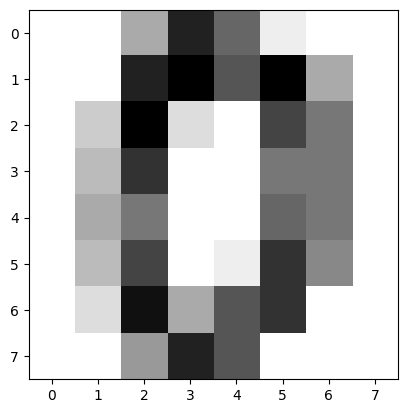

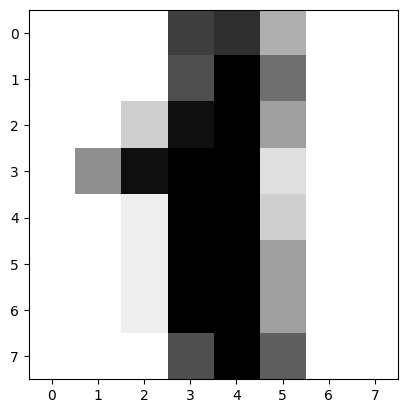

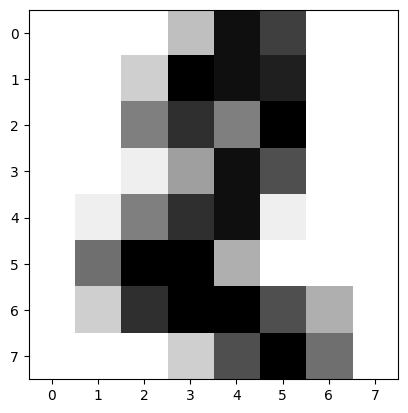

In [6]:
# Вывод первых нескольких изображений для визуализации
for image in data.images[:3]:
    plt.imshow(image, cmap=plt.cm.binary)  # Отображение изображения в черно-белой гамме
    plt.show()  # Показ изображения

In [7]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data.data,  # Признаки
    data.target,  # Метки
    test_size=0.5  # Размер тестовой выборки (50% данных)
)

# Проверка размеров полученных выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [8]:
# Создание экземпляра классификатора k-ближайших соседей с использованием полного перебора
classifier = KNeighborsClassifier(algorithm='brute')

# Обучение модели на обучающих данных
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [9]:
# Предсказание меток для тестовых данных
y_pred = classifier.predict(X_test)

In [10]:
# Вывод отчета о классификации, включающего метрики точности, полноты, F1-меры и матрицу ошибок
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       0.94      1.00      0.97        97
           2       1.00      0.97      0.98        98
           3       0.99      0.98      0.98        89
           4       1.00      0.98      0.99        88
           5       0.98      0.99      0.98        95
           6       0.99      1.00      0.99        88
           7       0.98      1.00      0.99        94
           8       0.98      0.93      0.95        86
           9       0.97      0.97      0.97        76

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



In [11]:
# Испортим модель увеличив параметр k-ближайших соседей для наглядности преобразований
# Создание экземпляра классификатора k-ближайших соседей с использованием полного перебора
classifier = KNeighborsClassifier(n_neighbors=200, algorithm='brute')

# Обучение модели на обучающих данных
classifier.fit(X_train, y_train)

# Предсказание меток для тестовых данных
y_pred = classifier.predict(X_test)

# Вывод отчета о классификации, включающего метрики точности, полноты, F1-меры и матрицу ошибок
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        88
           1       0.87      0.54      0.66        97
           2       0.85      0.70      0.77        98
           3       0.80      0.88      0.84        89
           4       0.95      0.89      0.92        88
           5       0.95      0.75      0.84        95
           6       0.84      1.00      0.91        88
           7       0.86      0.96      0.90        94
           8       0.73      0.77      0.75        86
           9       0.59      0.84      0.70        76

    accuracy                           0.83       899
   macro avg       0.83      0.83      0.82       899
weighted avg       0.84      0.83      0.82       899



In [12]:
# Формирование подробного отчёта о качестве классификации
# Сравниваются истинные метки (y_test) и предсказанные моделью (y_pred)
# output_dict=True сохраняет результат в виде словаря для удобного дальнейшего использования
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict  # Вывод отчёта в виде словаря

{'0': {'precision': 0.90625,
  'recall': 0.9886363636363636,
  'f1-score': 0.9456521739130435,
  'support': 88.0},
 '1': {'precision': 0.8666666666666667,
  'recall': 0.5360824742268041,
  'f1-score': 0.6624203821656051,
  'support': 97.0},
 '2': {'precision': 0.8518518518518519,
  'recall': 0.7040816326530612,
  'f1-score': 0.770949720670391,
  'support': 98.0},
 '3': {'precision': 0.8041237113402062,
  'recall': 0.8764044943820225,
  'f1-score': 0.8387096774193549,
  'support': 89.0},
 '4': {'precision': 0.9512195121951219,
  'recall': 0.8863636363636364,
  'f1-score': 0.9176470588235294,
  'support': 88.0},
 '5': {'precision': 0.9466666666666667,
  'recall': 0.7473684210526316,
  'f1-score': 0.8352941176470589,
  'support': 95.0},
 '6': {'precision': 0.8380952380952381,
  'recall': 1.0,
  'f1-score': 0.9119170984455959,
  'support': 88.0},
 '7': {'precision': 0.8571428571428571,
  'recall': 0.9574468085106383,
  'f1-score': 0.9045226130653267,
  'support': 94.0},
 '8': {'precision':

In [13]:
# Построение матрицы ошибок (confusion matrix)
# Показывает, сколько объектов каждого класса модель правильно/неправильно классифицировала
confusion = confusion_matrix(y_test, y_pred)
confusion  # Вывод матрицы ошибок в числовом виде

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52, 11,  2,  0,  0,  7,  0, 11, 14],
       [ 0,  4, 69, 15,  0,  0,  3,  2,  4,  1],
       [ 2,  0,  0, 78,  0,  1,  0,  1,  4,  3],
       [ 2,  0,  0,  0, 78,  0,  2,  5,  1,  0],
       [ 3,  0,  0,  1,  1, 71,  2,  0,  0, 17],
       [ 0,  0,  0,  0,  0,  0, 88,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 90,  3,  0],
       [ 1,  4,  1,  1,  0,  0,  3,  1, 66,  9],
       [ 1,  0,  0,  0,  2,  2,  0,  6,  1, 64]])

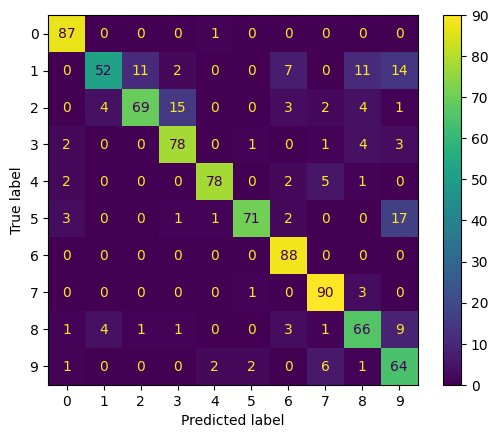

In [14]:
# Визуализация матрицы ошибок
# Создаётся объект для отображения матрицы, затем строится график
display = ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()  # Построение графика матрицы ошибок
plt.show()  # Отображение графика на экране

In [15]:
# Расчёт макро-средней F1-меры
# Усреднение F1-оценок по всем классам (от 0 до 9) без учёта их представленности
macro_avg_f1 = np.mean([report_dict[str(label)]['f1-score'] for label in range(10)])
macro_avg_f1  # Вывод значения макро-средней F1-меры

np.float64(0.8232765016062948)

In [16]:
# Расчёт взвешенной F1-меры
# Учитывает количество примеров в каждом классе (support)
nom = np.sum([report_dict[str(label)]['f1-score'] * report_dict[str(label)]['support'] for label in range(10)])  # Числитель: сумма произведений F1 на support
denom = np.sum([report_dict[str(label)]['support'] for label in range(10)])  # Знаменатель: общее количество примеров
weighted_avg_f1 = nom / denom  # Взвешенная F1-мера как отношение числителя к знаменателю
weighted_avg_f1  # Вывод значения взвешенной F1-меры

np.float64(0.8236036486675394)

In [17]:
# Задание сетки параметров для перебора в GridSearchCV
# Определяются возможные значения для трёх гиперпараметров модели
parame_grid = {
    'n_neighbors': [3, 4],  # Количество ближайших соседей для классификации
    'weights': ['uniform', 'distance'],  # Способ учёта соседей: одинаково или с весом по расстоянию
    'p': [2, 3]  # Параметр метрики расстояния (2 — евклидово, 3 — другое)
}

# Создание экземпляра классификатора k-ближайших соседей
# algorithm='brute' указывает на прямой перебор расстояний
classifier = KNeighborsClassifier(algorithm='brute')

# Настройка GridSearchCV для подбора лучших параметров
# Передаём классификатор и сетку параметров
clf = GridSearchCV(classifier, parame_grid)

# Обучение модели с подбором параметров
# Модель обучается на тренировочных данных (X_train, y_train)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'n_neighbors': [3, 4], 'p': [2, 3],
                         'weights': ['uniform', 'distance']})

In [18]:
# Вывод лучших найденных параметров
# Показывает комбинацию гиперпараметров, давшую наивысшую точность
clf.best_params_

{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

In [19]:
# Вывод лучшей оценки точности
# Средняя точность модели с лучшими параметрами на кросс-валидации
clf.best_score_

np.float64(0.9810738671632526)

In [20]:
# Создание финальной модели с оптимальными параметрами
# Используются лучшие параметры, найденные GridSearchCV
classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='brute', p=2)

# Обучение финальной модели на тренировочных данных
classifier.fit(X_train, y_train)

# Получение предсказаний на тестовых данных
y_pred = classifier.predict(X_test)

# Вывод итогового отчёта о качестве модели
# Печатается подробный отчёт с метриками для каждого класса
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       0.97      0.99      0.98        97
           2       1.00      0.97      0.98        98
           3       0.97      0.98      0.97        89
           4       1.00      0.99      0.99        88
           5       0.96      0.98      0.97        95
           6       0.99      1.00      0.99        88
           7       1.00      1.00      1.00        94
           8       0.98      0.98      0.98        86
           9       0.97      0.95      0.96        76

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

